#*An Examination of Some Financial Adages*


###*First Steps:*

Import and wrangle data

*All data has been sourced from the [Federal Reserve Bank of St. Louis](https://fred.stlouisfed.org/).  Three .csv files were utilized in the creation of this project. FRED only provides 10-years worth of data for the S&P 500 index, so I used this same 10-year period for all variables examined.  I worked with monthly data for everything but corporate profits, as these are released quarterly.  This forced me to wrangle, and decrease the size of my data set to 39 quarterly data points for all of the variables examined.  Enough to be statistically significant, but by no way encompassing.*

In [ ]:
# Grab and clean data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols


In [ ]:
from google.colab import files
files = files.upload()

Saving SP500_M2_monthly.csv to SP500_M2_monthly (3).csv
Saving SP500_CorpProfits_Quarterly.csv to SP500_CorpProfits_Quarterly (3).csv
Saving SP500_10year_monthly.csv to SP500_10year_monthly (3).csv


In [ ]:
# Read in montly data points from the S&P 500 Index, and for the 10-year Treasury.

SP500_10year_df = pd.read_csv('SP500_10year_monthly.csv')

# print out the shape and head of the data.

print(SP500_10year_df.shape)
display(SP500_10year_df.head(10))

(121, 3)


,DATE,SP500,DGS10
0,2010-11-01,.,2.763000
1,2010-12-01,.,3.290909
2,2011-01-01,1282.6185000000000000,3.394000
3,2011-02-01,1321.1178947368421053,3.576316
4,2011-03-01,1304.4860869565217391,3.414348
5,2011-04-01,1331.5050000000000000,3.455000
6,2011-05-01,1338.3104761904761905,3.168571
7,2011-06-01,1287.2886363636363636,3.002273
8,2011-07-01,1325.1845000000000000,3.003000
9,2011-08-01,1185.3056521739130435,2.303043


In [ ]:
# Examine the data for any NaN / Na values.

SP500_10year_df.isna().sum()

DATE     0
SP500    0
DGS10    0
dtype: int64

In [ ]:
# Ensure there are no spaces on either side of the feature names to be stripped.

cols = list(SP500_10year_df.columns)
print(cols, "\n")

# Probe data for types of objects stored.

print(SP500_10year_df.dtypes, "\n")

# Closer examination of an entry in the 'DATE' feature/variable.

print(type(SP500_10year_df.loc[6, 'DATE']), end=' ')

# Closer examination of an entry in the 'SP500' feature/variable.

print(type(SP500_10year_df.loc[6, 'SP500']))

['DATE', 'SP500', 'DGS10'] 

DATE      object
SP500     object
DGS10    float64
dtype: object 

<class 'str'> <class 'str'>


In [ ]:
# Slice off the first two entries; they have no values for the 'SP500' feature.

SP500_10year_df = SP500_10year_df[2:]

print(SP500_10year_df.shape)
display(SP500_10year_df.head())

(119, 3)


,DATE,SP500,DGS10
2,2011-01-01,1282.6185000000000000,3.394000
3,2011-02-01,1321.1178947368421053,3.576316
4,2011-03-01,1304.4860869565217391,3.414348
5,2011-04-01,1331.5050000000000000,3.455000
6,2011-05-01,1338.3104761904761905,3.168571


In [ ]:
# Reset the index.

SP500_10year_df.reset_index(drop=True, inplace=True)

print(SP500_10year_df.shape)
display(SP500_10year_df.head())

(119, 3)


,DATE,SP500,DGS10
0,2011-01-01,1282.6185000000000000,3.394000
1,2011-02-01,1321.1178947368421053,3.576316
2,2011-03-01,1304.4860869565217391,3.414348
3,2011-04-01,1331.5050000000000000,3.455000
4,2011-05-01,1338.3104761904761905,3.168571


In [ ]:
display(SP500_10year_df.tail())

,DATE,SP500,DGS10
114,2020-07-01,3207.6190909090909091,0.623636
115,2020-08-01,3391.7100000000000000,0.650000
116,2020-09-01,3365.5166666666666667,0.679524
117,2020-10-01,3418.7013636363636364,0.787143
118,2020-11-01,3548.9925000000000000,0.870000


In [ ]:
# Read in the montly data points for the M2 money supply.

M2_df = pd.read_csv('SP500_M2_monthly.csv')

# print out the shape and head of the data.

print(M2_df.shape)
display(M2_df.head())

(121, 3)


,DATE,SP500,M2
0,2010-11-01,.,8755.120
1,2010-12-01,.,8788.950
2,2011-01-01,1282.6185000000000000,8821.480
3,2011-02-01,1321.1178947368421053,8871.375
4,2011-03-01,1304.4860869565217391,8913.025


In [ ]:
# Examine for data types and NaN values.

print(M2_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    121 non-null    object 
 1   SP500   121 non-null    object 
 2   M2      121 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.0+ KB
None


In [ ]:
# Examine column names for spaces to strip on either side of name.

cols = list(M2_df.columns)
print(cols, "\n")

# Closer examination of the 'DATE', 'SP500', and 'M2' features/variables.

print(type(M2_df.loc[2, 'DATE']), end=' ')
print(type(M2_df.loc[2, 'SP500']), end=' ')
print(type(M2_df.loc[2, 'M2']))

['DATE', 'SP500', 'M2'] 

<class 'str'> <class 'str'> <class 'numpy.float64'>


In [ ]:
# Exclude the first two entries; they have no values for the 'SP500' feature.

M2_df = M2_df[2:]

print(M2_df.shape)
display(M2_df.head())

(119, 3)


,DATE,SP500,M2
2,2011-01-01,1282.6185000000000000,8821.480
3,2011-02-01,1321.1178947368421053,8871.375
4,2011-03-01,1304.4860869565217391,8913.025
5,2011-04-01,1331.5050000000000000,8966.725
6,2011-05-01,1338.3104761904761905,9027.200


In [ ]:
# Merge SP500_10year_df with M2_df.

SP500_10yr_M2 = pd.merge(SP500_10year_df, M2_df, how='left', on='SP500')

print(SP500_10yr_M2.shape)
display(SP500_10yr_M2.head())

(119, 5)


,DATE_x,SP500,DGS10,DATE_y,M2
0,2011-01-01,1282.6185000000000000,3.394000,2011-01-01,8821.480
1,2011-02-01,1321.1178947368421053,3.576316,2011-02-01,8871.375
2,2011-03-01,1304.4860869565217391,3.414348,2011-03-01,8913.025
3,2011-04-01,1331.5050000000000000,3.455000,2011-04-01,8966.725
4,2011-05-01,1338.3104761904761905,3.168571,2011-05-01,9027.200


In [ ]:
# Drop the duplicate 'DATE' column.

SP500_10yr_M2.drop(['DATE_y'], axis=1, inplace=True)

In [ ]:
SP500_10yr_M2.head()

,DATE_x,SP500,DGS10,M2
0,2011-01-01,1282.6185000000000000,3.394000,8821.480
1,2011-02-01,1321.1178947368421053,3.576316,8871.375
2,2011-03-01,1304.4860869565217391,3.414348,8913.025
3,2011-04-01,1331.5050000000000000,3.455000,8966.725
4,2011-05-01,1338.3104761904761905,3.168571,9027.200


In [ ]:
# Rename 'DATE_x' column.

SP500_10yr_M2.rename(columns = {'DATE_x': 'DATE'}, inplace=True)

print(SP500_10yr_M2.columns)


Index(['DATE', 'SP500', 'DGS10', 'M2'], dtype='object')


In [ ]:
# Read in quarterly corporate profit data.

corp_profits_df = pd.read_csv('SP500_CorpProfits_Quarterly.csv')

print(corp_profits_df.shape, "\n")
display(corp_profits_df.head())

(40, 3) 



,DATE,CP,CPATAX
0,2010-10-01,1599.159,1537.504
1,2011-01-01,1464.223,1385.233
2,2011-04-01,1529.084,1506.637
3,2011-07-01,1539.465,1562.105
4,2011-10-01,1617.095,1662.068


In [ ]:
# Drop pre-tax corporate profit column.  We are interested in after-tax profits.

corp_profits_df.drop(['CP'], axis=1, inplace=True)

In [ ]:
corp_profits_df.head()


,DATE,CPATAX
0,2010-10-01,1537.504
1,2011-01-01,1385.233
2,2011-04-01,1506.637
3,2011-07-01,1562.105
4,2011-10-01,1662.068


In [ ]:
# Merge SP500_10year_M2 with corp_profits_df.  Corporate profits are generated 
# quarterly, and are indicated less frequently than the data for the index,
# for interest rates, or for the money supply.  The merge is completed with 
# how='inner' making quarterly data points what's available for all features. 

SP_10yr_M2_CP = pd.merge(SP500_10yr_M2, corp_profits_df, how='inner', 
                            on='DATE')


In [ ]:
SP_10yr_M2_CP.head()

,DATE,SP500,DGS10,M2,CPATAX
0,2011-01-01,1282.6185000000000000,3.3940,8821.480,1385.233
1,2011-04-01,1331.5050000000000000,3.4550,8966.725,1506.637
2,2011-07-01,1325.1845000000000000,3.0030,9261.100,1562.105
3,2011-10-01,1207.2161904761904762,2.1520,9570.400,1662.068
4,2012-01-01,1300.5775000000000000,1.9665,9727.720,1705.692


In [ ]:
# Examine the data types for the new dataframe.

print(SP_10yr_M2_CP.dtypes, "\n")
print(type(SP_10yr_M2_CP.loc[0, 'DATE']), end=' ')
print(type(SP_10yr_M2_CP.loc[0, 'SP500']))

DATE       object
SP500      object
DGS10     float64
M2        float64
CPATAX    float64
dtype: object 

<class 'str'> <class 'str'>


In [ ]:
# Transform 'DATE' (string object) to a datetime object.

SP_10yr_M2_CP['DATE'] = pd.to_datetime(SP_10yr_M2_CP['DATE'], infer_datetime_format=True)

In [ ]:
# Verify 'DATE' is nw a datetime object.

print(SP_10yr_M2_CP.dtypes)

DATE      datetime64[ns]
SP500             object
DGS10            float64
M2               float64
CPATAX           float64
dtype: object


In [ ]:

# Change 'SP500' instances from strings to floats.

SP_10yr_M2_CP['SP500'] = SP_10yr_M2_CP['SP500'].apply(lambda x: float(x))

In [ ]:
# Verify changes.

print(SP_10yr_M2_CP.dtypes, "\n")
print(SP_10yr_M2_CP.shape, "\n")
display(SP_10yr_M2_CP.head())

DATE      datetime64[ns]
SP500            float64
DGS10            float64
M2               float64
CPATAX           float64
dtype: object 

(39, 5) 



,DATE,SP500,DGS10,M2,CPATAX
0,2011-01-01,1282.61850,3.3940,8821.480,1385.233
1,2011-04-01,1331.50500,3.4550,8966.725,1506.637
2,2011-07-01,1325.18450,3.0030,9261.100,1562.105
3,2011-10-01,1207.21619,2.1520,9570.400,1662.068
4,2012-01-01,1300.57750,1.9665,9727.720,1705.692


In [ ]:
# Truncate decimals to 1000ths.

cols = ['SP500', 'DGS10']

for col in cols:
    SP_10yr_M2_CP[col] = SP_10yr_M2_CP[col].apply(lambda x: round(x, 3))

In [ ]:
# Verify changes.

SP_10yr_M2_CP.head()

,DATE,SP500,DGS10,M2,CPATAX
0,2011-01-01,1282.619,3.394,8821.480,1385.233
1,2011-04-01,1331.505,3.455,8966.725,1506.637
2,2011-07-01,1325.185,3.003,9261.100,1562.105
3,2011-10-01,1207.216,2.152,9570.400,1662.068
4,2012-01-01,1300.578,1.966,9727.720,1705.692


###*Next steps:*

Visualize the data in relation to the S&P 500 index.

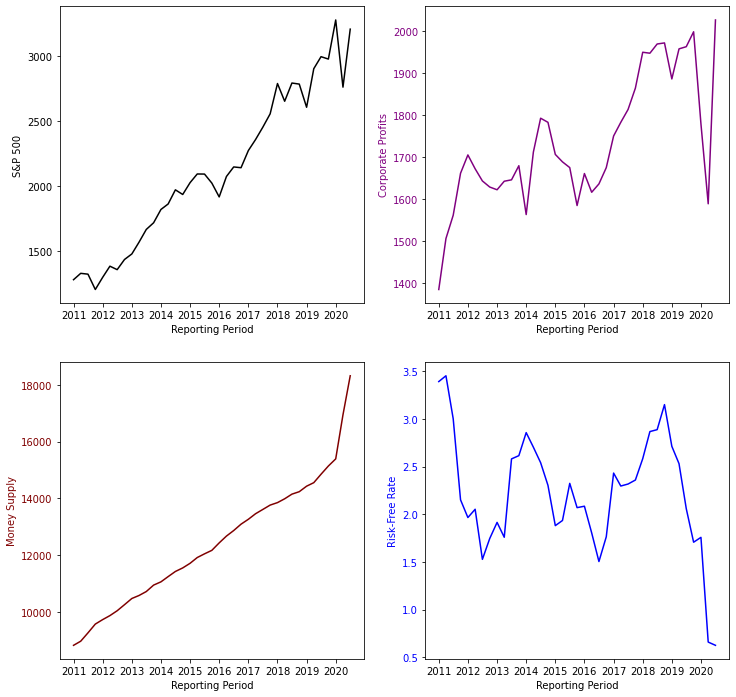

In [ ]:
# Quick graph of the 4 variables (1 dependent, 3 independent)

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0][0].plot(SP_10yr_M2_CP['DATE'], SP_10yr_M2_CP['SP500'], 'black')
ax[0][1].plot(SP_10yr_M2_CP['DATE'], SP_10yr_M2_CP['CPATAX'], 'purple')
ax[1][0].plot(SP_10yr_M2_CP['DATE'], SP_10yr_M2_CP['M2'], 'maroon')
ax[1][1].plot(SP_10yr_M2_CP['DATE'], SP_10yr_M2_CP['DGS10'], 'blue')

ax[0][0].set_xlabel('Reporting Period')
ax[0][0].set_ylabel('S&P 500')

ax[0][1].set_xlabel('Reporting Period')
ax[0][1].set_ylabel('Corporate Profits', color='purple')
ax[0][1].tick_params(axis='y', labelcolor='purple')

ax[1][0].set_xlabel('Reporting Period')
ax[1][0].set_ylabel('Money Supply', color='maroon')
ax[1][0].tick_params(axis='y', labelcolor='maroon')

ax[1][1].set_xlabel('Reporting Period')
ax[1][1].set_ylabel('Risk-Free Rate', color='blue')
ax[1][1].tick_params(axis='y', labelcolor='blue')

plt.show()

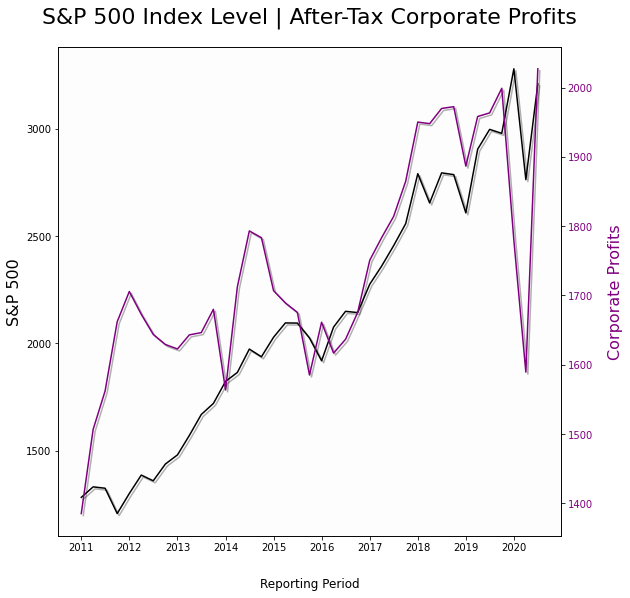

In [ ]:
# SP500 versus After-tax Corporate Profits.

import matplotlib.patheffects as path_effects

fig, ax = plt.subplots(figsize=(9, 9))

ax.set_facecolor('xkcd:pale grey')
ax.set_title('S&P 500 Index Level | After-Tax Corporate Profits',
             fontsize=22, pad=24)

ax.set_xlabel('Reporting Period', fontsize=12, labelpad=25)

ax.plot(SP_10yr_M2_CP['DATE'], SP_10yr_M2_CP['SP500'], color='black',
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
ax.set_ylabel('S&P 500', verticalalignment='bottom', fontsize=16)
ax.tick_params(axis='y')

ax2 = ax.twinx()

ax2.plot(SP_10yr_M2_CP['DATE'], SP_10yr_M2_CP['CPATAX'], color='purple',
         path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
ax2.set_ylabel('Corporate Profits', color='purple', verticalalignment='top', 
               fontsize=16, labelpad=15)
ax2.tick_params(axis='y', labelcolor='purple')

plt.show()

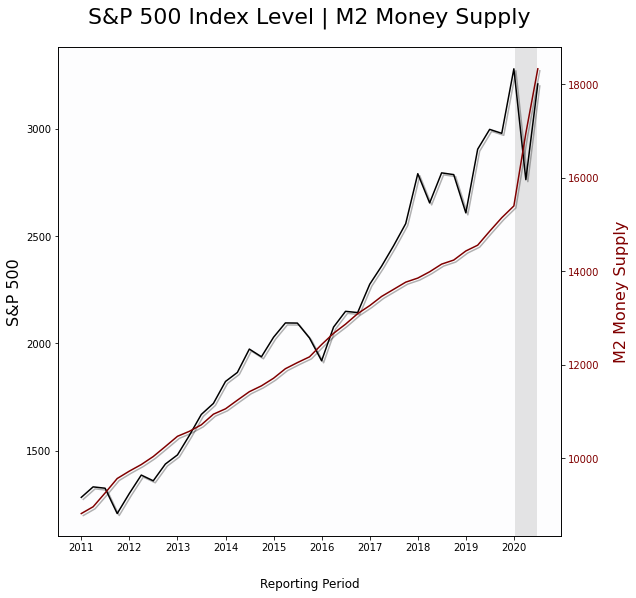

In [ ]:
# SP500 versus M2 money supply.

fig, ax = plt.subplots(figsize=(9, 9))

ax.set_title('S&P 500 Index Level | M2 Money Supply', fontsize=22, pad=24)
ax.set_facecolor('xkcd:pale grey')

ax.set_xlabel('Reporting Period', fontsize=12, labelpad=25)

ax.plot(SP_10yr_M2_CP['DATE'], SP_10yr_M2_CP['SP500'], color='black',  
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
ax.set_ylabel('S&P 500', verticalalignment='bottom', fontsize=16)
ax.tick_params(axis='y')

ax2 = ax.twinx()

ax2.plot(SP_10yr_M2_CP['DATE'], SP_10yr_M2_CP['M2'], color='maroon', 
         path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
ax2.set_ylabel('M2 Money Supply', color='maroon', verticalalignment='top', 
               fontsize=16, labelpad=15)
ax2.tick_params(axis='y', labelcolor='maroon')

ax.axvline(x=SP_10yr_M2_CP.loc[37, 'DATE'], linewidth=22, color=(0,0,0,0.1))

plt.show()

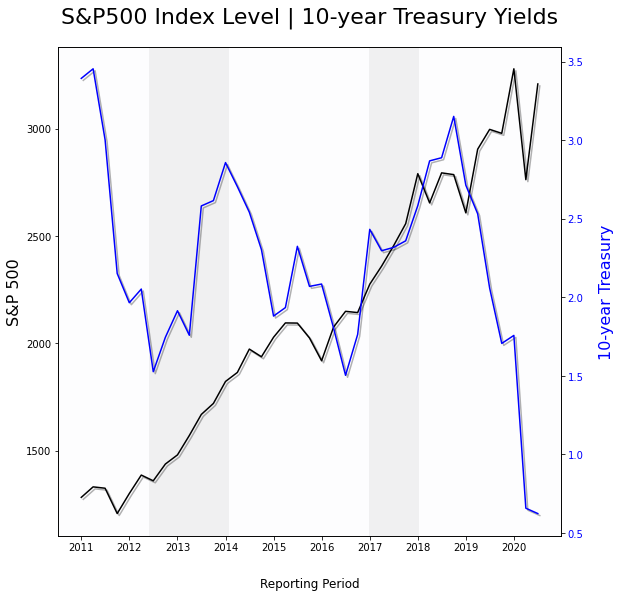

In [ ]:
# SP500 versus 10-year Treasury Yields.

fig, ax = plt.subplots(figsize=(9, 9))

# fig.set_facecolor('xkcd:baby blue')

ax.set_title('S&P500 Index Level | 10-year Treasury Yields', fontsize=22, pad=24)
ax.set_facecolor('xkcd:pale grey')
ax.set_xlabel('Reporting Period', fontsize=12, labelpad=25)

ax.plot(SP_10yr_M2_CP['DATE'], SP_10yr_M2_CP['SP500'], color='black', 
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
ax.set_ylabel('S&P 500', verticalalignment='bottom', fontsize=16)
ax.tick_params(axis='y')

ax2 = ax.twinx()

ax2.plot(SP_10yr_M2_CP['DATE'], SP_10yr_M2_CP['DGS10'], color='blue', 
         path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
ax2.set_ylabel('10-year Treasury', color='blue', verticalalignment='top',
               fontsize=16, labelpad=15)
ax2.tick_params(axis='y', labelcolor='blue')

ax.axvline(x=SP_10yr_M2_CP.loc[9, 'DATE'], linewidth=80, color=(0,0,0,0.05))
ax.axvline(x=SP_10yr_M2_CP.loc[26, 'DATE'], linewidth=50, color=(0,0,0,0.05))

plt.show()

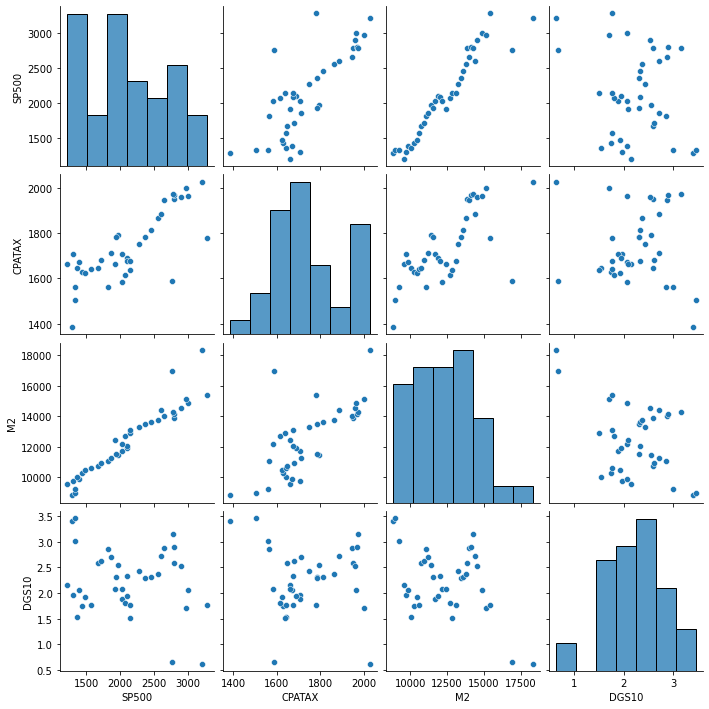

In [ ]:
# Pair plotting the features to further visually explore the data.

# SP500 levels appear related to Corporate Profits and the Money Supply.  There
# does not appear to be a strong relationship between the SP500 index level and
# the risk-free rate. 
# There also appears to possibly be a relationship betwen corporate profits and M2. 

to_plot = SP_10yr_M2_CP[['SP500', 'CPATAX', 'M2', 'DGS10']]

sns.pairplot(to_plot)
plt.show()


###*Next, let's look at the correlation coefficients and examine the strength between the S&P 500 with:*
- Corporate Profits
- Money Supply
- Risk-Free Rate



In [ ]:
# SP500 levels and corporate profits appear moderately to strongly correlated.

np.corrcoef(SP_10yr_M2_CP['CPATAX'], SP_10yr_M2_CP['SP500'])

array([[1.        , 0.79121386],
       [0.79121386, 1.        ]])

In [ ]:
# SP500 levels and the money supply appear very strongly correlated.

np.corrcoef(SP_10yr_M2_CP['M2'], SP_10yr_M2_CP['SP500'])

array([[1.        , 0.95396111],
       [0.95396111, 1.        ]])

In [ ]:
# SP500 levels and the risk-free rate do not appear strongly negatively correlated

np.corrcoef(SP_10yr_M2_CP['DGS10'],SP_10yr_M2_CP['SP500'])

array([[ 1.        , -0.21826718],
       [-0.21826718,  1.        ]])

In [ ]:
# Lets start our modeling looking at the features versus the SP500.

# We are able to reject the null hypothesis at the 0.05 alpha level, and 
# indicate that there is a relationship between after-tax corporate earnings 
# and the S&P 500 index level. 

model_earnings = ols('SP500 ~ CPATAX', data=SP_10yr_M2_CP).fit()

print(model_earnings.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     61.94
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           2.03e-09
Time:                        01:34:01   Log-Likelihood:                -285.15
No. Observations:                  39   AIC:                             574.3
Df Residuals:                      37   BIC:                             577.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3256.0356    685.434     -4.750      0.0

In [ ]:
# We are able to reject the null hypothesis at the 0.05 alpha level, refute
# the null hypothesis, and indicate that there is a relationship between 
# the M2 money supply and the S&P 500 index level.

model_M2 = ols('SP500 ~ M2', data=SP_10yr_M2_CP).fit()

print(model_M2.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     374.3
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           6.08e-21
Time:                        01:34:01   Log-Likelihood:                -257.37
No. Observations:                  39   AIC:                             518.7
Df Residuals:                      37   BIC:                             522.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1073.3320    167.514     -6.407      0.0

In [ ]:
# The risk-free rate, by itself, does not appear statistically significant in 
# explaining variations in the SP500 index levels.

model_10year = ols('SP500 ~ DGS10', data=SP_10yr_M2_CP).fit()

print(model_10year.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.851
Date:                Fri, 08 Jan 2021   Prob (F-statistic):              0.182
Time:                        01:34:01   Log-Likelihood:                -303.38
No. Observations:                  39   AIC:                             610.8
Df Residuals:                      37   BIC:                             614.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2589.1003    359.183      7.208      0.0

###*Let's use the model_M2 and add corporate earnings to see it's effects.*

Ho: $\beta_2$ = 0

Ha: $\beta_2 \neq$ 0

The Null Hypthothesis states that after taking into account the effects of the M2 money supply, there is no relationship betwteen after-tax coroprate earnings and the SP500 Index level. 

In [ ]:
# Let's use the model_M2 and add corporate earnings to see it's effects.

# Adjusted R-squared improves to about 93%.
# After accounting for differences in the money supply, corporate profits appear 
# to be significantly associated with SP500 Index levels. 

model_M2_CP = ols('SP500 ~ M2 + CPATAX', data=SP_10yr_M2_CP).fit()

print(model_M2_CP.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     251.2
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           7.16e-22
Time:                        01:34:01   Log-Likelihood:                -251.58
No. Observations:                  39   AIC:                             509.2
Df Residuals:                      36   BIC:                             514.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2032.0111    308.889     -6.578      0.0

Based on the test outputs, with a t-stat of 3.525 and a P value of < 0.05, we can reject the null hypthesis and state that after accounting for changes in the money supply, there is a statistically significant relationship between corporate earnings and the SP500 Index. 

###*Let's use the model_M2_CP and add the risk-free rate to see it's effects.*

Ho: $\beta_3$ = 0

Ha: $\beta_3 \neq$ 0

The Null Hypthothesis states that after accounting for the effects of the M2 money supply, and after-tax coroprate earnings, there is no significant relationship between the risk-free rate and the SP500 Index level. 

In [ ]:
# Let's use the model_M2_CP and add the risk-free rate to see it's effects.

# Adjusted R-squared improves to about 95%
# After accounting for changes in the money supply, and corporate profits, the  
# risk-free rate appears to be significantly associated SP500 Index levels. 

model_M2_CP_10year = ols('SP500 ~ M2 + CPATAX + DGS10', data=SP_10yr_M2_CP).fit()
print(model_M2_CP_10year.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     259.6
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           5.78e-24
Time:                        01:34:01   Log-Likelihood:                -242.98
No. Observations:                  39   AIC:                             494.0
Df Residuals:                      35   BIC:                             500.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2290.2451    257.980     -8.878      0.0